# Introduction
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
What? Spot-checking on CLASSIFICATION problems.

You cannot know which algorithms are best suited to your problem beforehand. You must trial a number of 
methods and focus attention on those that prove themselves the most promising.

-->>LINEAR<<-- models:
[1.1] Logistic Regression
[1.2] Linear Discriminant Analysis

-->>NON-LINEAR<<-- models:
[2.1] k-Nearest Neighbors
[2.2] Naive Bayes
[2.3] Classification and Regression Trees
[2.4] Support Vector Machines
"""

# Import modules
<hr style = "border:2px solid black" ></hr>

In [25]:
from pandas import read_csv
from sklearn.svm import SVC
from matplotlib import pyplot
from matplotlib import rcParams
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from IPython.display import Markdown, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Import dataset
<hr style = "border:2px solid black" ></hr>

In [4]:
filename = '../DATASETS/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names = names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
print("Input size: ", X.shape)
print("Labels size: ", Y.shape)

Input size:  (768, 8)
Labels size:  (768,)


# LINEAR MODEL: Logistic regression
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
Logistic regression assumes a Gaussian distribution for the numeric
input variables and can model binary classification problems.
"""

In [10]:
kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = LogisticRegression(max_iter = 250)
results = cross_val_score(model, X, Y, cv=kfold)
print(f"Mean: {results.mean():.4f}, standard deviation {results.std():.4f}")

Mean: 0.7722, standard deviation 0.0497


# LINEAR MODEL: Linear Discriminant Analysis
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
Linear Discriminant Analysis or LDA is a statistical technique 
for binary and multiclass classification. It too assumes a Gaussian 
distribution for the numerical input variables.
"""

In [12]:
kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(f"Mean: {results.mean():.4f}, standard deviation {results.std():.4f}")

Mean: 0.7670, standard deviation 0.0480


# NON-LINEAR MODEL: k-nearest neighbours
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
The k-Nearest Neighbors algorithm (or KNN) uses a distance metric 
to find the k most similar instances in the training data for a 
new instance and takes the mean outcome of the neighbors as the 
prediction. 
"""

In [13]:
kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(f"Mean: {results.mean():.4f}, standard deviation {results.std():.4f}")

Mean: 0.7110, standard deviation 0.0508


# NON-LINEAR MODEL: Naive Bayes
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
Naive Bayes calculates the probability of each class and the conditional
probability of each class given each input value. These probabilities 
are estimated for new data and multiplied together, assuming that they 
are all independent (a simple or naive assumption). When working with 
real-valued data, a Gaussian distribution is assumed to easily estimate 
the probabilities for input variables using the Gaussian Probability Density Function
"""

In [14]:
kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(f"Mean: {results.mean():.4f}, standard deviation {results.std():.4f}")

Mean: 0.7591, standard deviation 0.0390


# NON-LINEAR MODEL: CART (decision tree)
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
Classification and Regression Trees (CART or just decision trees) 
construct a binary tree from the training data. Split points 
are chosen greedily by evaluating each attribute and each value 
of each attribute in the training data in order to minimize a cost 
function (like the Gini index).
"""

In [15]:
kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(f"Mean: {results.mean():.4f}, standard deviation {results.std():.4f}")

Mean: 0.6928, standard deviation 0.0575


# NON-LINEAR MODEL: SVM Support Vector Machine
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
Support Vector Machines (or SVM) seek a line that best separates two classes.
Those data instances that are closest to the line that best separates the
classes are called support vectors and influence where the line is placed.
"""

In [16]:
kfold = KFold(n_splits=10, shuffle = True, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(f"Mean: {results.mean():.4f}, standard deviation {results.std():.4f}")

Mean: 0.7605, standard deviation 0.0347


# Comparison
<hr style = "border:2px solid black" ></hr>

In [17]:
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter = 250)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [21]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle = True, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)    
    print(f"{name} Mean: {cv_results.mean():.4f}, standard deviation {cv_results.std():.4f}")

LR Mean: 0.7722, standard deviation 0.0497
LDA Mean: 0.7670, standard deviation 0.0480
KNN Mean: 0.7110, standard deviation 0.0508
CART Mean: 0.6863, standard deviation 0.0513
NB Mean: 0.7591, standard deviation 0.0390
SVM Mean: 0.7605, standard deviation 0.0347


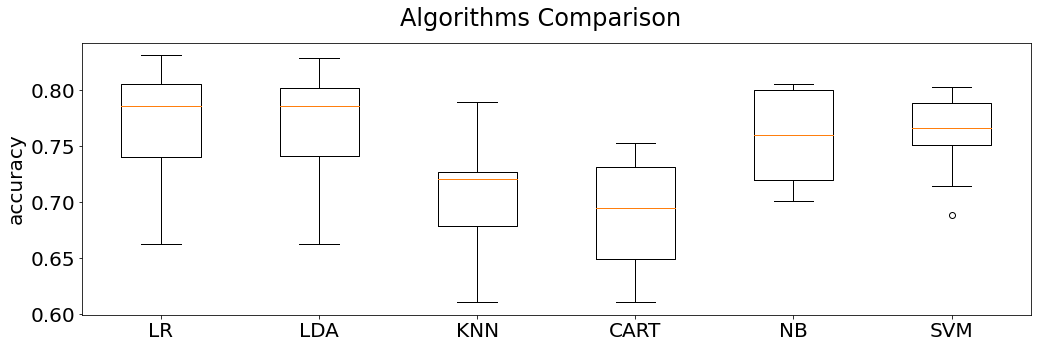

In [29]:
 # boxplot algorithm comparison
rcParams['font.size'] = 20
rcParams['figure.figsize'] = 17, 5
fig = pyplot.figure() 
fig.suptitle('Algorithms Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
ax.set_ylabel(scoring) 
pyplot.show()    

# References
<hr style = "border:2px solid black" ></hr>

- https://machinelearningmastery.com/spot-check-classification-machine-learning-algorithms-python-scikit-learn/- 